In [20]:
import numpy as np

# Хотим найти среднее число черных вершин. Будем рассматривать последовательность допустимых конфигураций, 
# каждая отличется друг от друга изменением цвета в одной вершине. Таким образом получим случайное блуждание

def black_vertices(mas):
    t = 0
    for i in range(N):
        for j in range(N):
            if(mas[i][j] == 1):
                t += 1
    return t

# mas массив массивов
def sample_black_vertices (mas):
    dop = []
    for i in range(len(mas)):
        dop.append(black_vertices(mas[i]))
    return dop

def neighbour_vertices(i, j):
    dop = []
    if((0 <= i < N) and (0 <= j-1 < N)):
        dop.append([i, j-1])
    if((0 <= i < N) and (0 <= j+1 < N)):
        dop.append([i, j+1])
    if((0 <= i-1 < N) and (0 <= j < N)):
        dop.append([i-1, j])
    if ((0 <= i+1 < N) and (0 <= j < N)):
        dop.append([i+1, j])
    return dop

def vertices_to_change(mas):
    dop = []
    for i in range(N):
        for j in range(N):
            if(mas[i, j] == 1):
                dop.append([i, j])
            if(mas[i, j] == 0):
                t = 0
                new = neighbour_vertices(i, j)
                for k in range(len(new)):
                    n, m = new[k]
                    t += mas[n, m]
                if (t == 0):
                    dop.append([i, j])
    return dop

def change_vertice(mas):
    new_mas = vertices_to_change(mas)
    dop = mas.copy()
    n, m = new_mas[np.random.randint(len(new_mas))]
    if(mas[n, m] == 1):
        dop[n, m] = 0
    else:
        dop[n, m] = 1
    new_dop = vertices_to_change(dop)
    if(np.random.uniform() < (len(new_mas)/len(new_dop))):
        return dop
    else:
        return mas
    
def sample_of_arrays(mas, k):
    dop = mas
    new_dop = [mas]
    for i in range(k):
        dop = change_vertice(dop)
        new_dop.append(dop)
    return new_dop

N = 8
k = 10000

mas = np.zeros(N*N).reshape(N, N)
new_mas = sample_of_arrays(mas, k)
black = sample_black_vertices(new_mas)

print(" Среднее число черных вершин ", np.array(black).mean())



 Среднее число черных вершин  15.272572742725728


 Проверка стационарности Ttest_indResult(statistic=-0.08124084195466869, pvalue=0.9352622942131644)


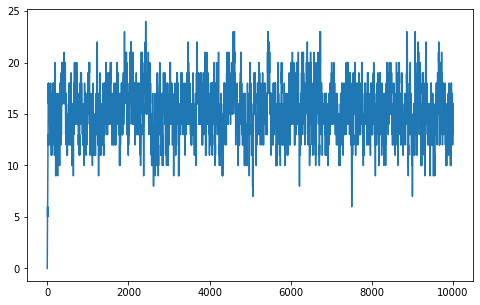

In [25]:
from scipy import stats
import matplotlib.pyplot as plt

def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

print(" Проверка стационарности", g_test(black[k//10:]))
plt.figure(figsize = (8,5))
plt.plot(black)

# То есть гипотезц стационарности не отвыергаем

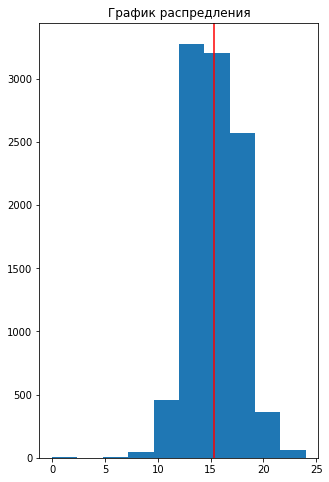

In [28]:
plt.figure(figsize = (5,8))
plt.hist(black)
plt.title("График распредления")
plt.axvline(mean_amount,c='r')
plt.show()